# EDA - Table of Contents
<a id="0"></a> <br>
In this notebook, the EDA for the project "Mietpreisprognose im Schweizer Wohnungsmarkt" is presented.

1. [Setup](#1)
    - [SQL Server](#2)
    - [MYSQL](#3)
2. [EDA](#4)
    - [Summary statistics of numeric variables](#5)
    - [Skewness and Kurtosis](#6)
        - [Skewness](#7)
        - [Kurtosis](#8)
        - [Graphical Representation of Skewness and Kurtosis](#9)
    - [Distribution](#10)
        - [Distribution per Object Type](#11)
        - [Top 10 Object Types](#12)
        - [Top 10 Landlords](#13)
        - [Top 10 Features](#14)
    - [Extreme Values](#15)
        - [Cheapest Properties](#16)
        - [Most Expensive Properties](#17)
    - [Contingency Tables](#18)
        - [Number of Rooms across entire Price Range](#19)
        - [Number of Rooms and certain Price Range I](#20)
        - [Number of Rooms and certain Price Range II](#21)
    - [Correlations](#22)
        - [Relationship of Prices and Proximity to Services](#23)
        - [Relationship of Prices and Income- and Wealth taxes and Population Density](#24)
        - [Relationship between Variables](#25)
        - [Relationship of Price and Number of Rooms](#26)
        - [Relationship of Price and Various Variables](#27)
    - [Visualization of Geographical Data](#29)
        - [Heatmap](#30)
       - [Interactive Heatmap](#31)

<a id="1"></a> 
## Setup

<a id="2"></a>
### SQL Server

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import folium
from folium.plugins import HeatMap

sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

print(os.getcwd())

#DB-Connection
driver = '{ODBC Driver 17 for SQL Server}' # This might be a different version on your system
server = 'ANNINAYOGA\SQLEXPRESS'
database = 'Immo'
username = 'immoadmin'
password = 'zhaw$1234'
connection_string = f"DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

#Connection and SQL-Query for table property
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM property"
df_property = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

#Connection and SQL-Query for table location
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM location"
df_location = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

#Connection and SQL-Query for table location
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM PropertyAdditionalFeatures"
df_features = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

# Querying the cleaned property table
file_path = r'C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience\filtered_property_location_clean.csv'

try:
    # CSV-Datei einlesen mit dem spezifizierten Trennzeichen und Fehlerbehandlung
    df_filtered_property_location_clean = pd.read_csv(file_path, sep=';', quotechar='"', on_bad_lines='skip')
except Exception as e:
    print("Ein Fehler ist aufgetreten:", e)

c:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience


In [3]:
    #Check number of entries
    num_entries = len(df_filtered_property_location_clean)
    print("Anzahl der Einträge:", num_entries)

Anzahl der Einträge: 8830


<a id="3"></a>
### MYSQL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from sqlalchemy import create_engine

# Database connection details
db_config = {
    'host': '127.0.0.1',
    'port': '13306',
    'user': 'admin',
    'password': 'admin123',
    'database': 'immo'
}

# Create the engine
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

# Querying the property table
query_property = "SELECT * FROM Property"
df_property = pd.read_sql(query_property, engine)

# Querying the location table
query_location = "SELECT * FROM Location"
df_location = pd.read_sql(query_location, engine)

<a id="4"></a>
## EDA

Overview of the dataframe with the cleaned data

In [ ]:
df_filtered_property_location_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8830 entries, 0 to 8829
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ListingId                     8830 non-null   int64  
 1   Timestamp                     8830 non-null   object 
 2   Rooms                         8830 non-null   float64
 3   SquareMeter                   8830 non-null   float64
 4   Floor                         7823 non-null   object 
 5   Availability                  8830 non-null   object 
 6   ObjectType                    8830 non-null   object 
 7   YearBuilt                     4523 non-null   object 
 8   Price                         8830 non-null   float64
 9   AdditionalCost                7456 non-null   float64
 10  NetPrice                      7986 non-null   float64
 11  LocationId                    8830 non-null   object 
 12  PropertyAdditionalFeaturesId  8830 non-null   object 
 13  Pro

<a id="5"></a>
### Summary Statistics of Numeric Variables

The following sheet presents the descriptive statistics of the data

In [ ]:
df_filtered_property_location_clean.describe()

,ListingId,Rooms,SquareMeter,Price,AdditionalCost,NetPrice,zip,longitude,latitude,bfs_number,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
count,8.830000e+03,8830.000000,8830.000000,8830.000000,7456.000000,7986.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8830.000000,8784.000000,8830.000000,8830.000000,8830.000000,8830.000000
mean,3.946604e+09,3.593715,91.592978,2110.622990,241.018374,1861.479339,5358.602605,8.059633,47.071996,3353.218573,135.761710,113.392903,135.920713,113.421328,1759.831284,5.674292,1.686863,10.339185,24.219712
std,2.317371e+08,1.271222,44.121019,1315.418515,101.922355,1215.437684,2626.824216,0.896426,0.494864,2051.458870,71.624318,56.231793,71.540253,56.196198,2361.437332,4.167129,2.226682,20.913099,10.128699
min,1.081471e+08,1.000000,10.000000,200.000000,1.000000,80.000000,1000.000000,5.974333,45.832144,1.000000,50.000000,25.000000,50.000000,25.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000731e+09,2.500000,66.000000,1464.000000,180.000000,1260.000000,3063.000000,7.413802,46.815887,1632.000000,99.000000,75.000000,99.000000,75.000000,399.750000,3.000000,0.000000,1.000000,18.426587
50%,4.000863e+09,3.500000,85.000000,1817.500000,230.000000,1590.000000,5063.000000,8.036034,47.253676,3203.000000,105.000000,107.000000,105.000000,107.000000,875.000000,5.000000,1.000000,3.000000,21.875000
75%,4.000933e+09,4.500000,107.000000,2348.750000,290.000000,2050.000000,8050.000000,8.856197,47.440647,5192.000000,147.500000,141.000000,147.500000,141.000000,1932.000000,8.000000,2.000000,9.000000,27.000000
max,4.000977e+09,15.000000,680.000000,25000.000000,2550.000000,20000.000000,9657.000000,10.336857,47.785978,6812.000000,335.000000,525.000000,335.000000,525.000000,12811.000000,27.000000,18.000000,202.000000,228.000000


In [ ]:
df_features.describe()

,ListingId,Feature
count,40850,40850
unique,8935,39
top,e3dcf7ee-ec9f-4ef3-be60-b33cf9dd54ed,Balkon / Terrasse
freq,19,6194


<a id="6"></a>
### Skewness and Kurtosis

<a id="7"></a>
#### Skewness
Skewness of attributes Price, Rooms, SquareMeter, Price_per_m2

In [ ]:
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].skew()

Price           5.081200
Rooms           0.870751
SquareMeter     2.828242
Price_per_m2    3.560368
dtype: float64

<a id="8"></a>
#### Kurtosis
Kurtosis of attributes Price, Rooms, SquareMeter, Price_per_m2

In [ ]:
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].kurtosis()

Price           46.010947
Rooms            4.329768
SquareMeter     19.216008
Price_per_m2    31.132945
dtype: float64

<a id="9"></a>
#### Graphical Representation of Skewness and Kurtosis
The following four charts show the distribution and skewness of Price, Rooms, Square Meters, and Price_per_m2.

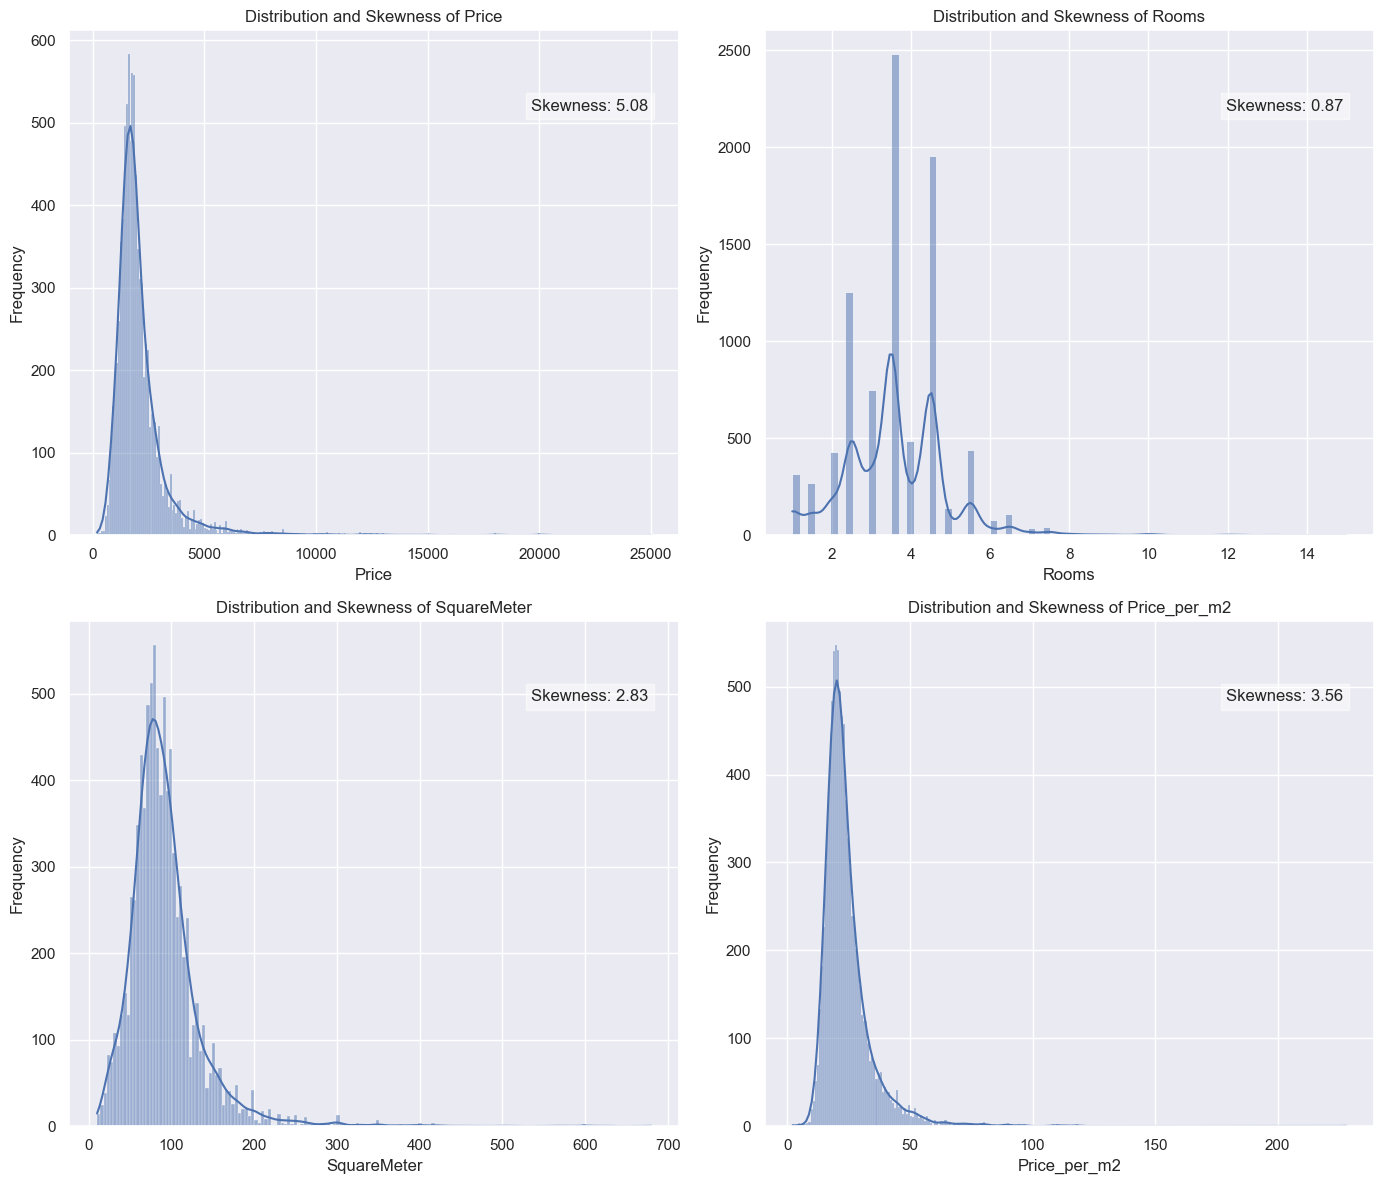

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 Grid für 4 Plots
columns = ['Price', 'Rooms', 'SquareMeter', 'Price_per_m2']
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    sns.histplot(df_filtered_property_location_clean[col], kde=True, ax=ax)
    ax.set_title(f'Distribution and Skewness of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    skew_val = df_filtered_property_location_clean[col].skew()
    ax.text(0.95, 0.85, f'Skewness: {skew_val:.2f}', transform=ax.transAxes, 
            horizontalalignment='right', verticalalignment='center', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

<a id="10"></a>
### Distribution

<a id="11"></a>
#### Distribution per Object Type
The following diagram shows the distribution per Object Type

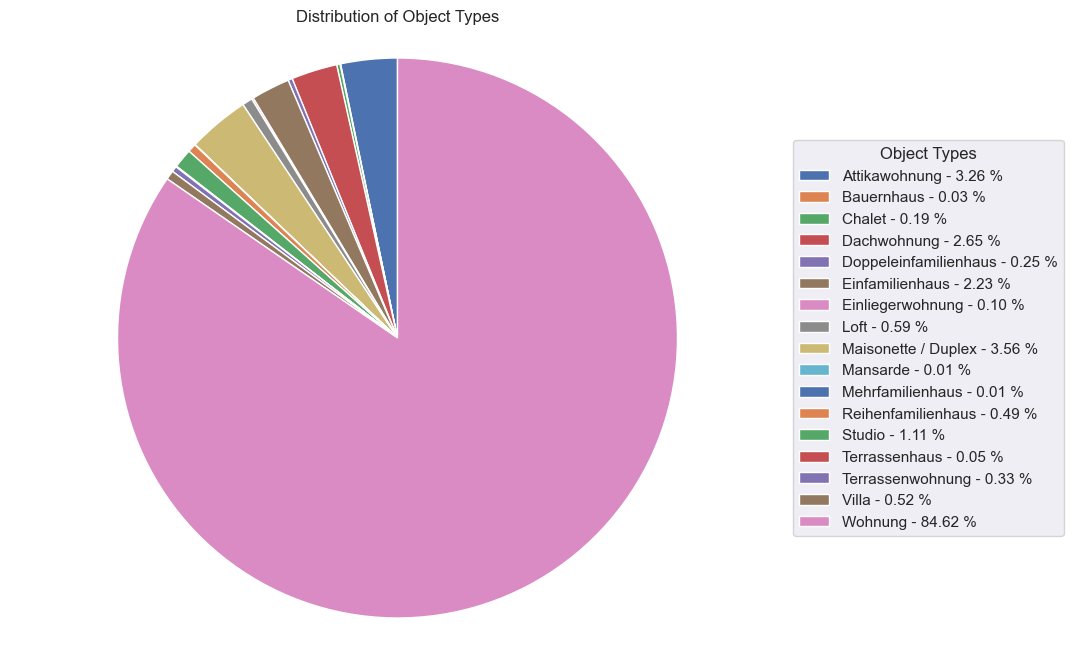

In [ ]:
object_type_counts = df_filtered_property_location_clean.groupby('ObjectType').size()
percentages = 100 * object_type_counts / object_type_counts.sum()
legend_labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(object_type_counts.index, percentages)]

sns.set(style="dark")

plt.figure(figsize=(10, 8))
patches, texts = plt.pie(object_type_counts, labels=None, startangle=90)

plt.axis('equal')
plt.legend(patches, legend_labels, title="Object Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Object Types')
plt.show()

<a id="12"></a>
#### Top 10 Object Types
The top 10 Object Types are shown in the following bar chart

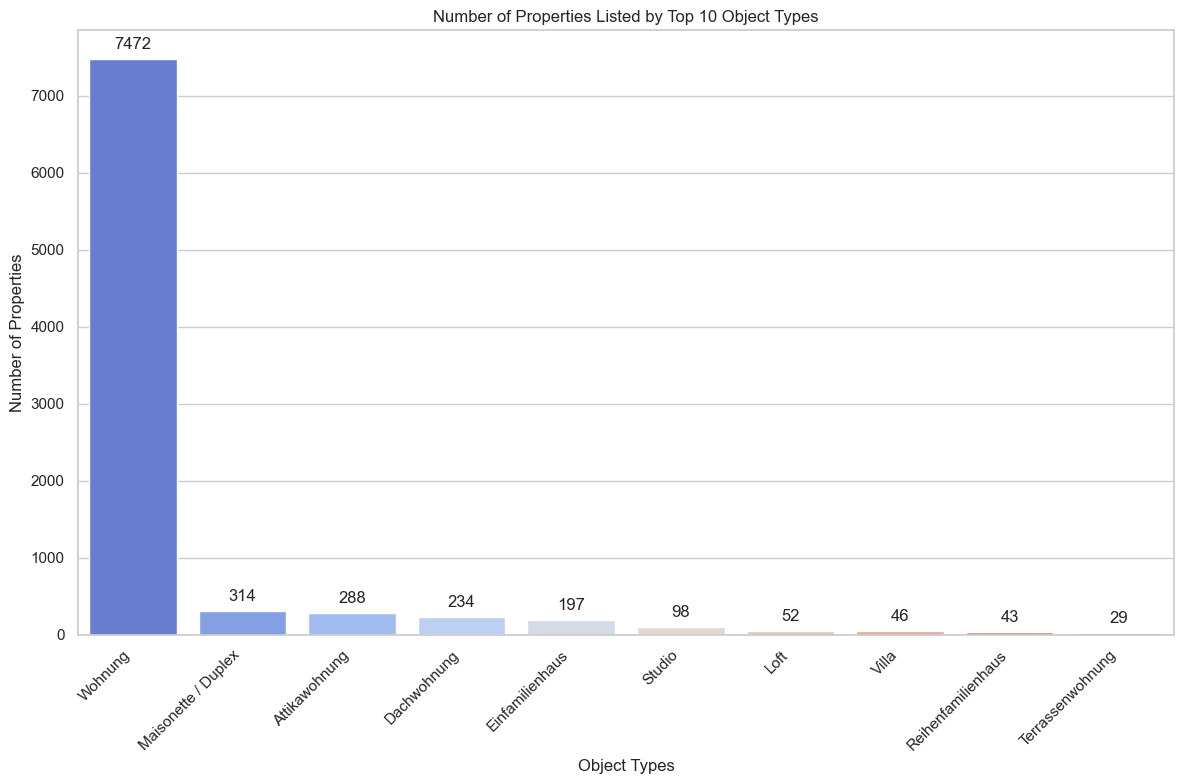

In [ ]:
objecttype_counts = df_filtered_property_location_clean['ObjectType'].value_counts()

# Select the top 10 ObjectTypes
top_objecttypes = objecttype_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 ObjectTypes
top_objecttypes_data = df_filtered_property_location_clean[df_filtered_property_location_clean['ObjectType'].isin(top_objecttypes)]

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='ObjectType', data=top_objecttypes_data, palette='coolwarm', order=top_objecttypes)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Set the titles and labels
plt.title('Number of Properties Listed by Top 10 Object Types')
plt.xlabel('Object Types')
plt.ylabel('Number of Properties')

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Adjust layout to fit the rotated x labels
plt.tight_layout()
plt.show()

<a id="13"></a>
#### Top 10 Landlords
The properties are offered by the following top 10 landlords

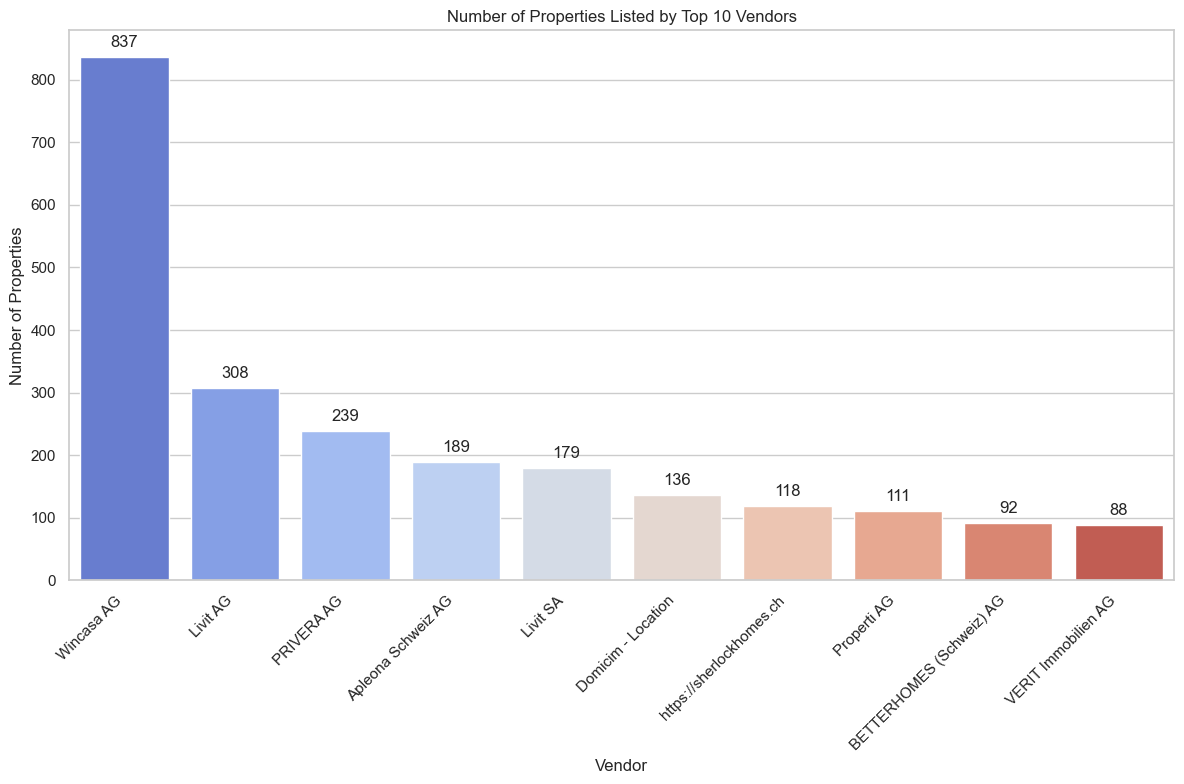

In [ ]:
vendor_counts = df_filtered_property_location_clean['Vendor'].value_counts()

top_vendors = vendor_counts.nlargest(10).index

top_vendors_data = df_filtered_property_location_clean[df_filtered_property_location_clean['Vendor'].isin(top_vendors)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Vendor', data=top_vendors_data, palette='coolwarm', order=top_vendors)

plt.xticks(rotation=45, ha='right')

plt.title('Number of Properties Listed by Top 10 Vendors')
plt.xlabel('Vendor')
plt.ylabel('Number of Properties')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()

<a id="14"></a>
#### Top 10 Features
The top 10 Features of a property are shown in the following bar chart

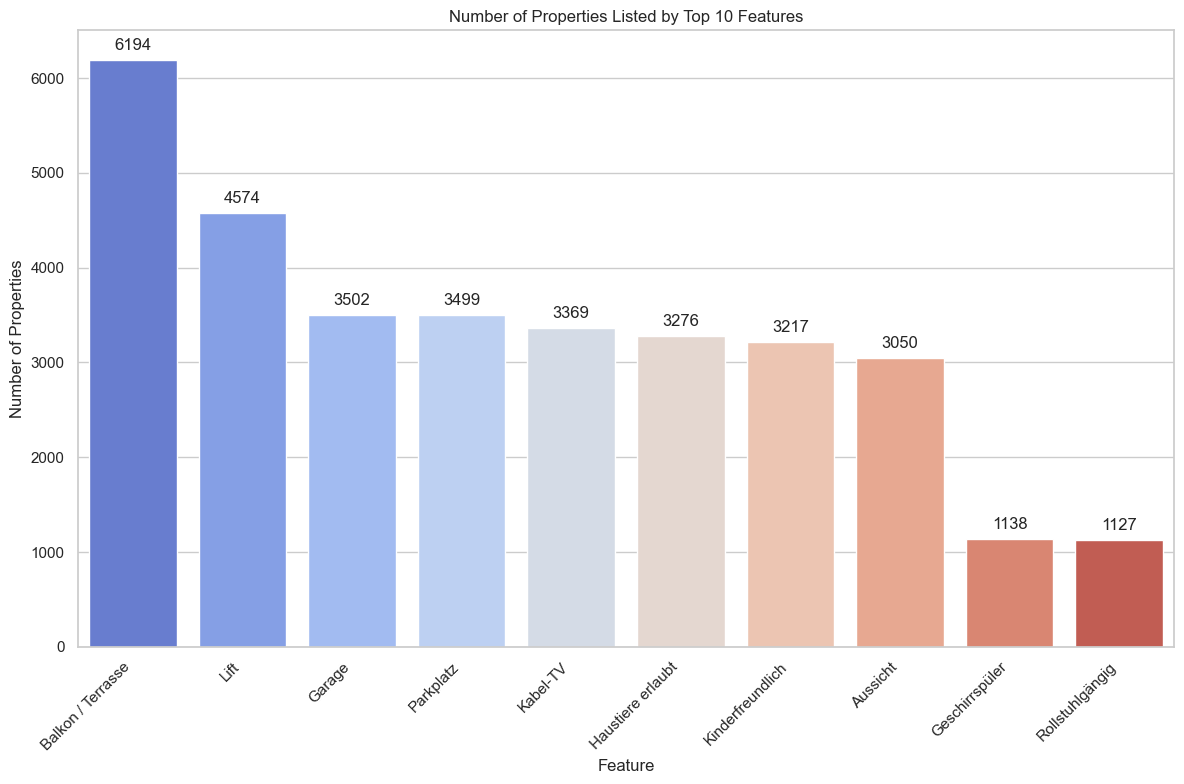

In [ ]:
feature_counts = df_features['Feature'].value_counts()

# Select the top 10 Features
top_features = feature_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 Features
top_features_data = df_features[df_features['Feature'].isin(top_features)]

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Feature', data=top_features_data, palette='coolwarm', order=top_features)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Set the titles and labels
plt.title('Number of Properties Listed by Top 10 Features')
plt.xlabel('Feature')
plt.ylabel('Number of Properties')

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Adjust layout to fit the rotated x labels
plt.tight_layout()
plt.show()

<a id="15"></a>
### Extreme Values

<a id="16"></a>
#### Cheapest Properties
The following table lists the ten cheapest properties based on price per square meter

In [ ]:
filtered_df = df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] <= 10]
sorted_df = filtered_df.sort_values(by='Price_per_m2')
top_10_cheapest_properties = sorted_df.head(10)
top_10_cheapest_properties

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
1236,3000342437,2024-03-27 14:34:47,4.5,100.0,NaN,Sofort,Chalet,1900-01-01,200.0,NaN,...,Surses,100.0,90.0,100.0,90.0,7.0,0,0,0,2.000000
859,4000935764,2024-03-27 21:19:52,1.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,820.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,2.733333
814,4000935766,2024-03-27 21:19:28,2.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,1470.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,4.900000
858,4000935765,2024-03-27 21:19:40,4.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,1470.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,4.900000
1107,4000740722,2024-03-27 17:16:55,4.0,80.0,2,Sofort,Maisonette / Duplex,NaN,400.0,NaN,...,Bure,285.0,225.0,285.0,225.0,47.0,1,0,0,5.000000
5941,4000958101,2024-03-27 13:56:40,1.0,130.0,NaN,Nach Vereinbarung,Wohnung,NaN,800.0,NaN,...,Luzern,160.0,170.0,160.0,170.0,2827.0,5,2,2,6.153846
460,4000861865,2024-03-29 17:15:38,4.5,258.0,EG,01.06.2024,Wohnung,1985-01-01,1952.0,100.0,...,Martigny,100.0,110.0,100.0,110.0,620.0,6,2,36,7.565891
1031,4000860782,2024-03-27 17:13:17,6.5,180.0,3,Sofort,Wohnung,NaN,1400.0,250.0,...,Courrendlin,285.0,225.0,285.0,225.0,165.0,1,0,0,7.777778
698,4000903763,2024-03-27 15:53:07,5.5,240.0,1,01.07.2024,Maisonette / Duplex,NaN,1950.0,200.0,...,Delémont,285.0,190.0,285.0,190.0,572.0,21,6,18,8.125000
1030,4000862123,2024-03-27 17:13:06,4.0,98.0,2,Sofort,Wohnung,NaN,800.0,150.0,...,La Baroche,285.0,215.0,285.0,215.0,37.0,1,0,0,8.163265


<a id="17"></a>
#### Most Expensive Properties
The following table lists the ten most expensive properties based on price per square meter

In [ ]:
filtered_df_high = df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] >= 100]
sorted_df_high = filtered_df_high.sort_values(by='Price_per_m2', ascending=False)
top_10_expensive_properties = sorted_df_high.head(10)
top_10_expensive_properties

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
8703,4000665076,2024-03-29 22:18:16,1.0,15.0,1,Nach Vereinbarung,Wohnung,NaN,3420.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12811.0,12,7,85,228.000000
8750,3003125493,2024-03-29 22:32:20,1.0,50.0,NaN,Nach Vereinbarung,Wohnung,NaN,5917.0,211.0,...,Genève,147.5,45.49,147.5,45.49,12811.0,9,12,106,118.340000
4250,3003168595,2024-03-24 03:17:41,1.0,36.0,NaN,Nach Vereinbarung,Wohnung,NaN,4246.0,156.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,4,76,117.944444
8190,4000842714,2024-03-29 18:58:03,1.5,13.0,2,Sofort,Wohnung,2018-01-01,1530.0,NaN,...,Sion,100.0,110.00,100.0,110.00,995.0,4,0,3,117.692308
3864,4000920597,2024-03-24 01:42:30,3.0,36.0,4,Sofort,Dachwohnung,2023-01-01,4120.0,NaN,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,3,27,114.444444
4245,3003169310,2024-03-24 03:14:31,2.0,37.0,NaN,Nach Vereinbarung,Wohnung,NaN,4142.0,152.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,9,5,126,111.945946
4244,3003169151,2024-03-24 03:15:30,2.0,46.0,NaN,Nach Vereinbarung,Wohnung,NaN,5076.0,186.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,4,76,110.347826
4128,3003168603,2024-03-24 02:44:06,2.0,32.0,NaN,Nach Vereinbarung,Wohnung,NaN,3519.0,129.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,10,1,35,109.968750
1351,4000857273,2024-03-27 13:52:45,7.5,230.0,NaN,Nach Vereinbarung,Einfamilienhaus,NaN,25000.0,NaN,...,Horw,160.0,145.00,160.0,145.00,1108.0,2,0,0,108.695652
1353,4000465081,2024-03-29 22:19:24,1.0,25.0,5,Sofort,Wohnung,NaN,2700.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12811.0,10,9,79,108.000000


<a id="18"></a>
### Contingency Tables

<a id="1"></a>
#### Number of Rooms across entire Price Range
The following table shows the frequencies of properties with a certain number of rooms across the entire price range.

In [ ]:
df = df_filtered_property_location_clean

pivot_table_df = df.pivot_table(index='Rooms', columns=pd.cut(df['Price'], bins=8), values='Price', aggfunc='count', fill_value=0)

styled_pivot_table = (pivot_table_df
                      .style
                      .background_gradient(axis=None)
                      .bar(axis=None)
                      .set_properties(**{'color': 'black'}))

styled_pivot_table

Price,"(175.2, 3300.0]","(3300.0, 6400.0]","(6400.0, 9500.0]","(9500.0, 12600.0]","(12600.0, 15700.0]","(15700.0, 18800.0]","(18800.0, 21900.0]","(21900.0, 25000.0]"
Rooms,,,,,,,,
1.000000,310,6,0,0,0,0,0,0
1.500000,270,0,0,0,0,0,0,0
2.000000,411,17,1,0,0,0,0,0
2.500000,1224,29,0,0,0,0,0,0
3.000000,730,16,2,0,0,0,0,0
3.500000,2376,97,6,0,0,0,0,0
4.000000,435,48,1,0,0,0,0,0
4.500000,1769,162,19,4,0,0,0,0
5.000000,89,49,3,0,0,0,0,0


<a id="20"></a>
#### Number of Rooms and certain Price Range I
The following table shows the frequencies of properties with a certain number of rooms and a certain price range (CHF 136.89 - 3245).

In [ ]:
#More details on prices between CHF 136.895 - 3245.-
df = df_filtered_property_location_clean

price_range_filtered = df[(df['Price'] > 136.895) & (df['Price'] <= 3247.5)]

price_bins = pd.cut(price_range_filtered['Price'], bins=8)
pivot_table_df = price_range_filtered.pivot_table(index='Rooms', columns=price_bins, values='Price', aggfunc='count', fill_value=0)

styled_pivot_table = (pivot_table_df
                      .style
                      .background_gradient(axis=None)
                      .bar(axis=None)
                      .set_properties(**{'color': 'black'}))

styled_pivot_table

Price,"(196.955, 580.625]","(580.625, 961.25]","(961.25, 1341.875]","(1341.875, 1722.5]","(1722.5, 2103.125]","(2103.125, 2483.75]","(2483.75, 2864.375]","(2864.375, 3245.0]"
Rooms,,,,,,,,
1.000000,13,133,92,40,15,8,5,4
1.500000,3,97,84,46,29,6,3,2
2.000000,1,50,159,108,52,21,10,8
2.500000,0,53,274,516,227,79,48,22
3.000000,0,28,157,304,144,50,20,25
3.500000,0,21,216,747,805,325,165,88
4.000000,1,3,44,161,113,45,42,23
4.500000,1,2,66,349,613,387,233,109
5.000000,0,0,2,17,24,23,10,12


<a id="21"></a>
#### Number of Rooms and certain Price Range II
The following table shows the frequencies of properties with a certain number of rooms and a certain price range (CHF 1304 - 2856).

In [ ]:
df = df_filtered_property_location_clean

price_range_filtered = df[(df['Price'] > 1304.00) & (df['Price'] <= 2856.00)]

price_bins = pd.cut(price_range_filtered['Price'], bins=8)
pivot_table_df = price_range_filtered.pivot_table(index='Rooms', columns=price_bins, values='Price', aggfunc='count', fill_value=0)

styled_pivot_table = (pivot_table_df
                      .style
                      .background_gradient(axis=None)
                      .bar(axis=None)
                      .set_properties(**{'color': 'black'}))

styled_pivot_table

Price,"(1307.453, 1502.375]","(1502.375, 1695.75]","(1695.75, 1889.125]","(1889.125, 2082.5]","(2082.5, 2275.875]","(2275.875, 2469.25]","(2469.25, 2662.625]","(2662.625, 2856.0]"
Rooms,,,,,,,,
1.000000,22,21,9,8,5,3,0,5
1.500000,26,18,16,13,7,1,2,1
2.000000,80,38,32,22,11,11,6,5
2.500000,286,232,157,81,56,30,30,22
3.000000,149,147,92,62,33,21,8,13
3.500000,316,384,479,356,219,138,110,65
4.000000,85,81,53,54,34,17,24,19
4.500000,122,197,300,312,222,192,134,102
5.000000,6,10,8,13,17,10,6,4


<a id="22"></a>
### Correlations

<a id="23"></a>
#### Relationship of Prices and Proximity to Services

The following correlation matrix shows the relationships between property prices and their proximity to various services.

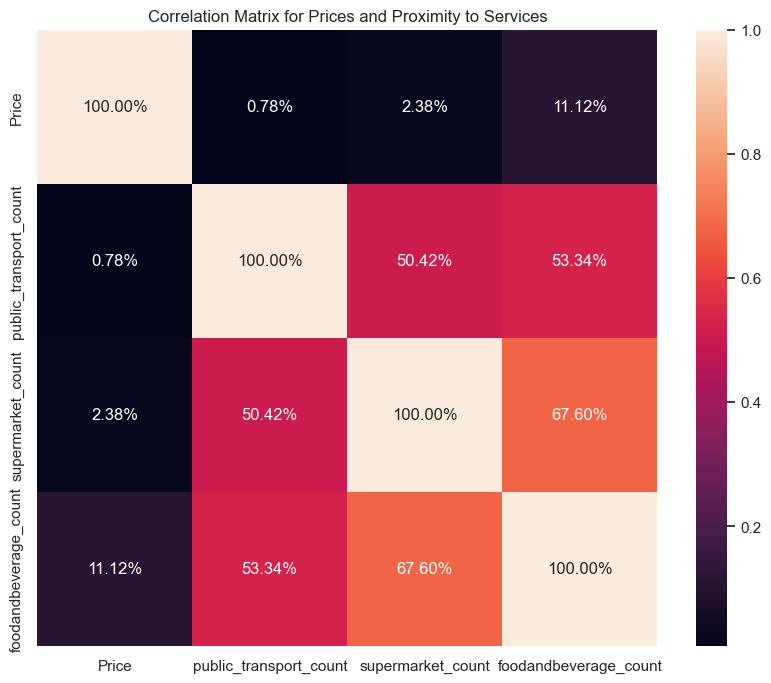

In [ ]:
df_filtered_property_location_clean.dropna(subset=['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count'], inplace=True)

correlation_matrix = df_filtered_property_location_clean[['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2%')

plt.title('Correlation Matrix for Prices and Proximity to Services')
plt.show()

<a id="24"></a>
#### Relationship of Prices and Income- and Wealth taxes and Population Density

The following correlation matrix shows the relationships between property prices and their rooms and square meters.

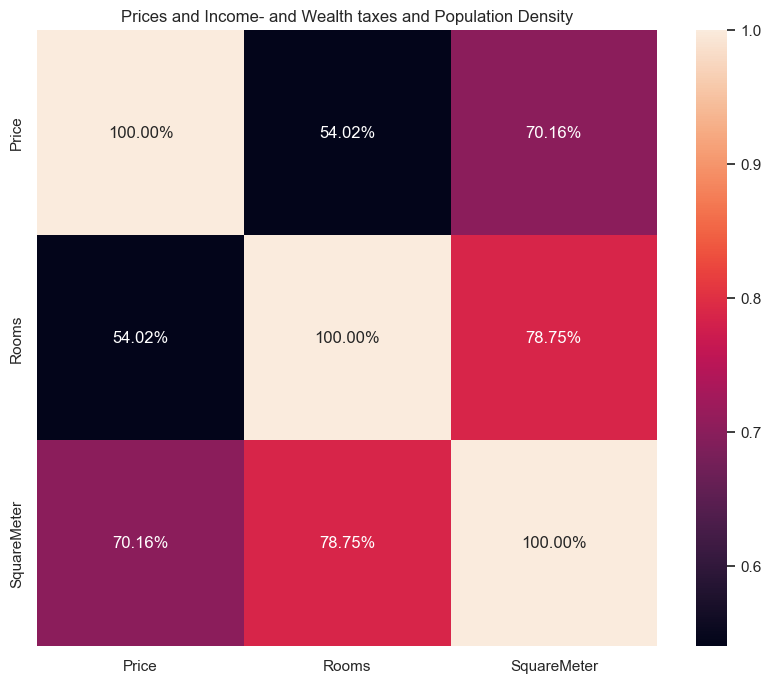

In [ ]:
plt.figure(figsize=(10,8))
columns =['Price','Rooms','SquareMeter']
sns.heatmap(df_filtered_property_location_clean[columns].corr(),annot=True,fmt='.2%')
plt.title('Correlation Matrix for Prices and Income- and Wealth taxes and Population Density')
plt.show()

<a id="25"></a>
#### Relationship between Variables

The following correlation matrix shows the relationships between property prices and various factors, including income tax and wealth tax rates at the canton and municipal levels, as well as population density.

In [ ]:
plt.figure(figsize=(10,8))
columns =['Price','incometax_canton','wealthtax_canton','incometax_municipality','wealthtax_municipality','population_density']
sns.heatmap(df_filtered_property_location_clean[columns].corr(),annot=True,fmt='.2%')
plt.title('Correlation Matrix for Prices and Various Factors')
plt.show()

NameError: name 'plt' is not defined

<a id="26"></a>
#### Relationship of Price and Number of Rooms

The following scatter plots show the relationship between the price and the number of rooms in the properties. The second and third plots focus on smaller and more affordable properties.

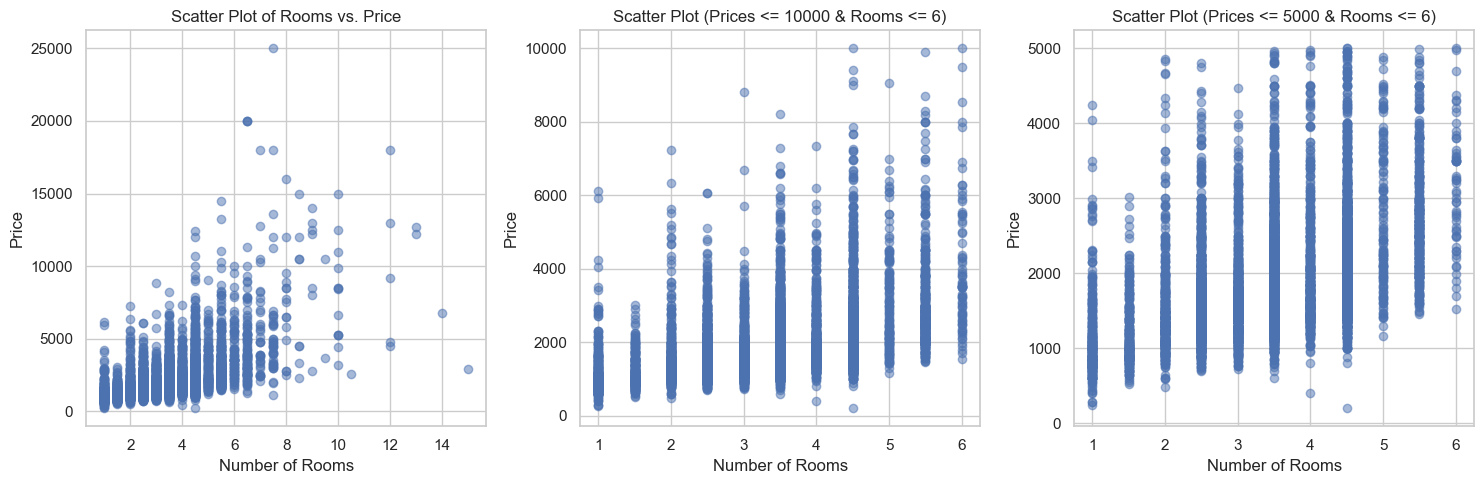

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original DataFrame scatter plot
axes[0].scatter(df_filtered_property_location_clean['Rooms'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[0].set_title('Scatter Plot of Rooms vs. Price')
axes[0].set_xlabel('Number of Rooms')
axes[0].set_ylabel('Price')

# Filtered DataFrame scatter plot (Prices <= 10000 and Rooms <= 6)
filtered_df = df_filtered_property_location_clean[(df_filtered_property_location_clean['Price'] <= 10000) & (df_filtered_property_location_clean['Rooms'] <= 6)]
axes[1].scatter(filtered_df['Rooms'], filtered_df['Price'], alpha=0.5)
axes[1].set_title('Scatter Plot (Prices <= 10000 & Rooms <= 6)')
axes[1].set_xlabel('Number of Rooms')
axes[1].set_ylabel('Price')

# Further filtered DataFrame scatter plot (Prices <= 5000 and Rooms <= 6)
filtered2_df = df_filtered_property_location_clean[(df_filtered_property_location_clean['Price'] <= 5000) & (df_filtered_property_location_clean['Rooms'] <= 6)]
axes[2].scatter(filtered2_df['Rooms'], filtered2_df['Price'], alpha=0.5)
axes[2].set_title('Scatter Plot (Prices <= 5000 & Rooms <= 6)')
axes[2].set_xlabel('Number of Rooms')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

<a id="27"></a>
#### Relationship of Price and Various Variables

The following scatter plots show the relationship between the price and a various variables.

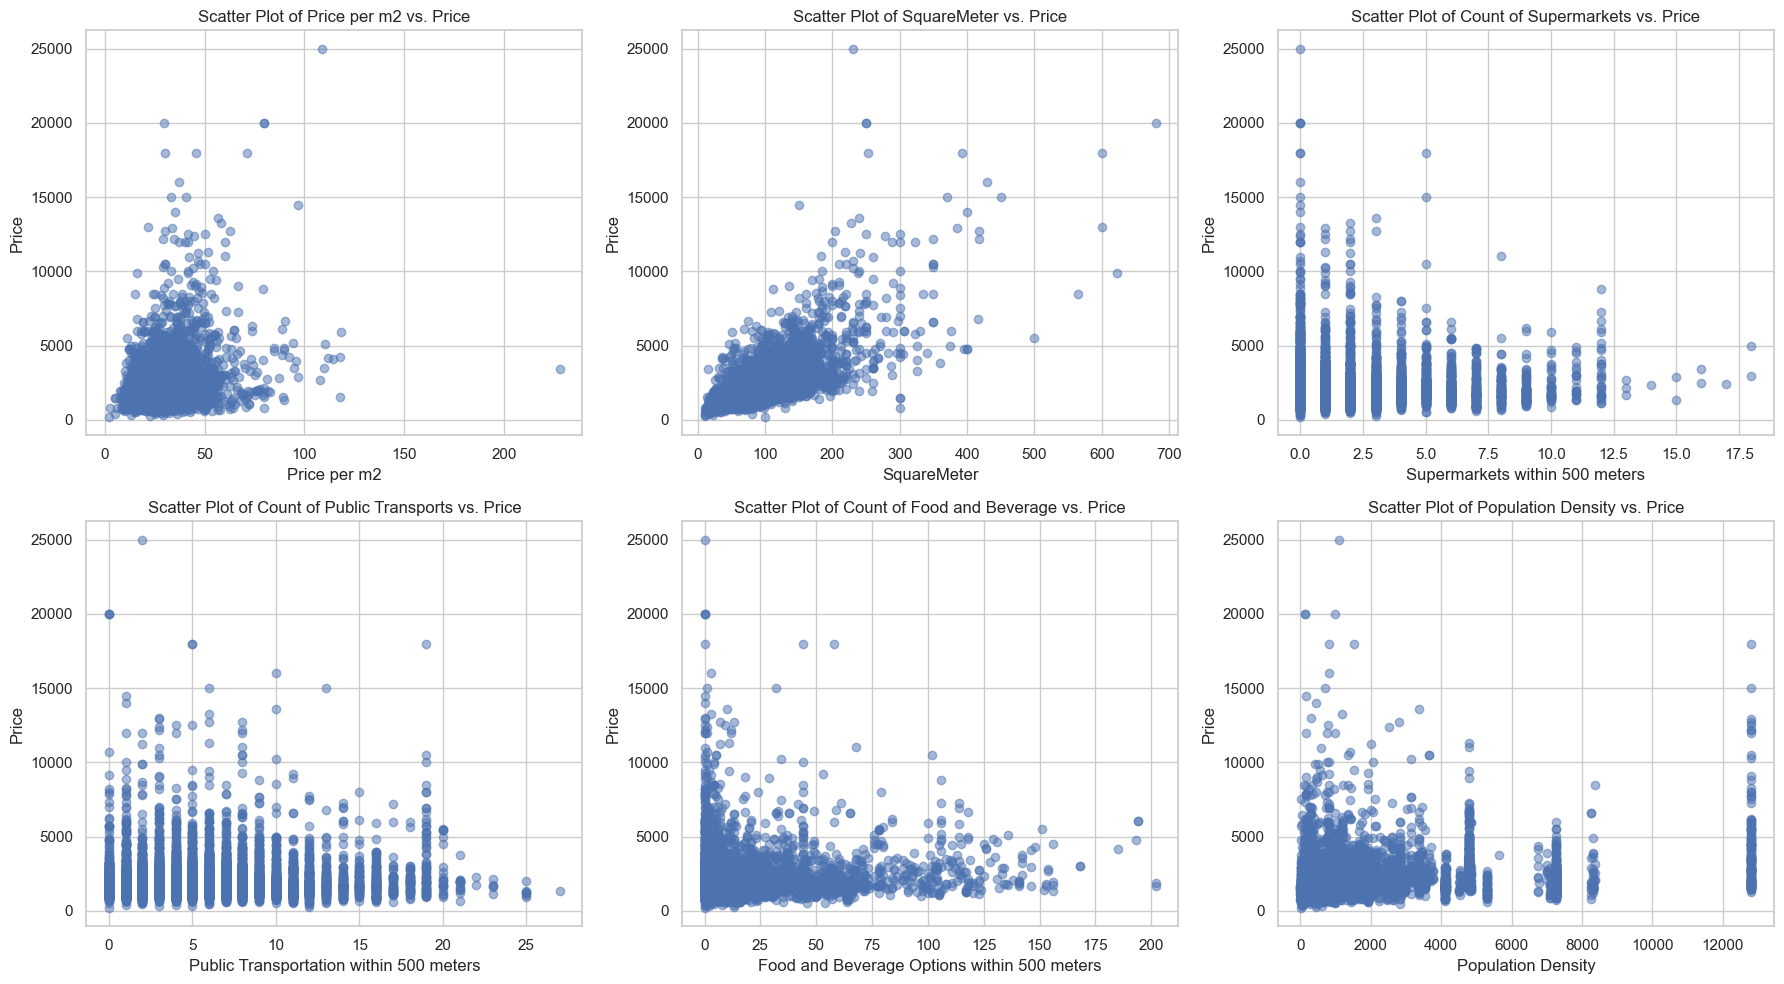

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Scatter plot for Price per m2 vs. Price
axes[0, 0].scatter(df_filtered_property_location_clean['Price_per_m2'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[0, 0].set_title('Scatter Plot of Price per m2 vs. Price')
axes[0, 0].set_xlabel('Price per m2')
axes[0, 0].set_ylabel('Price')

# Scatter plot for SquareMeter vs. Price
axes[0, 1].scatter(df_filtered_property_location_clean['SquareMeter'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[0, 1].set_title('Scatter Plot of SquareMeter vs. Price')
axes[0, 1].set_xlabel('SquareMeter')
axes[0, 1].set_ylabel('Price')

# Scatter plot for Count of Supermarkets vs. Price
axes[0, 2].scatter(df_filtered_property_location_clean['supermarket_count'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[0, 2].set_title('Scatter Plot of Count of Supermarkets vs. Price')
axes[0, 2].set_xlabel('Supermarkets within 500 meters')
axes[0, 2].set_ylabel('Price')

# Scatter plot for Count of Public Transports vs. Price
axes[1, 0].scatter(df_filtered_property_location_clean['public_transport_count'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[1, 0].set_title('Scatter Plot of Count of Public Transports vs. Price')
axes[1, 0].set_xlabel('Public Transportation within 500 meters')
axes[1, 0].set_ylabel('Price')

# Scatter plot for Count of Food and Beverage vs. Price
axes[1, 1].scatter(df_filtered_property_location_clean['foodandbeverage_count'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[1, 1].set_title('Scatter Plot of Count of Food and Beverage vs. Price')
axes[1, 1].set_xlabel('Food and Beverage Options within 500 meters')
axes[1, 1].set_ylabel('Price')

# Scatter plot for Population Density vs. Price
axes[1, 2].scatter(df_filtered_property_location_clean['population_density'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[1, 2].set_title('Scatter Plot of Population Density vs. Price')
axes[1, 2].set_xlabel('Population Density')
axes[1, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()


<a id="29"></a>
### Visualization of Geographical Data

<a id="30"></a>
#### Heatmap
The following code snippet presents a heatmap of all properties. It utilizes the longitude and latitude coordinates. The Price attribute is used as the weight for each point, with areas of high concentrations of expensive properties being more intensely colored. 

In [ ]:
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), 
                           df_filtered_property_location_clean['longitude'].mean()], 
                 zoom_start=8,  
                 min_zoom=2,  
                 max_zoom=12) 

heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

HeatMap(heat_data).add_to(map)

map

<a id="31"></a>
#### Interactive Heatmap
The following code snippet is used to create an interactive heatmap and save it as Heatmap.html. It utilizes the longitude and latitude coordinates. The Price attribute is used as the weight for each point, with areas of high concentrations of expensive properties being more intensely colored. For each property, the price, number of rooms, and square meters are displayed.

Due to performance considerations, the heatmap is saved as an HTML file (Trust HTML) instead of being loaded directly in the notebook. 

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered at the mean latitude and longitude, with a zoomed-out view
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), 
                           df_filtered_property_location_clean['longitude'].mean()], 
                 zoom_start=10)  # Set to a more zoomed-out view

# Create data for the Heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

# Add the Heatmap to the map object
HeatMap(heat_data).add_to(map)

# Optional: Add markers with tooltips
for index, row in df_filtered_property_location_clean.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"<strong>Preis:</strong> {row['Price']} CHF<br><strong>Anzahl Zimmer:</strong> {row['Rooms']}<br><strong>Quadratmeter:</strong> {row['SquareMeter']} m²",
        tooltip="Klicke für mehr Informationen"
    ).add_to(map)

map.save('Heatmap.html')
#map


End of EDA